<a href="https://colab.research.google.com/github/AjitNikam1/Red-Wine-quality/blob/master/RedWineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Project -Red Wine quality
In this problem, the goal is to model the quality of red wine, based on its physical properties. This dataset consists of attributes related to the red wine variant of the Portuguese "Vinho Verde" wine



##Import Required Packages

In [0]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


## Read Data

In [0]:
# Read data from Githun repository
url = 'https://raw.githubusercontent.com/AjitNikam1/Red-Wine-quality/master/winequality-red.csv' # Url for importing Data from Github Repo
RedWineData = pd.read_csv(url,delimiter=";") #Delimiter argument added as data is seperated by semicolon in .csv file 
RedWineData.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

### General Data Set Inormation 

In [0]:
# Lets look into general Dataset information
RedWineData.info()
# We have toltal 12 columns and 1599 records in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Statistical Summary of Dataset

In [0]:
# Lets see the statistical summary of the dataset
RedWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Pandas profiling

In [0]:
#Perform Pandas profiling to understand quick overview of Dataset

import pandas_profiling
report = pandas_profiling.ProfileReport(RedWineData)
#convert profile report as html file
report.to_file("RedWineData_data.html")

from IPython.display import display,HTML,IFrame
display(HTML(open('RedWineData_data.html').read()))



/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,150.0 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


**Observation:**
- citric acid column has 8.3% zero values and we need to process those values.
- Datset has total 240 duplicate records and we need to remove them

## Data Cleaning & Preprocessing


### Process zero values from citric acid column

In [0]:
# replace o values from citric acid column by Mean values
RedWineData['citric acid'] = RedWineData['citric acid'].replace( 0 ,RedWineData['citric acid'].mean())
# Check non-zero values in citric acid
np.count_nonzero(RedWineData["citric acid"])
# All zero values from citric acid are replaced by column mean


1599

### Remove duplicate records from the Dataset

In [0]:
# As observed in Pandas profilling result remove all 240 duplicate records from the dataset
RedWineData.drop_duplicates(keep='first',inplace=True) 
# Check removal of duplicate records
RedWineData.shape

(1359, 12)

### Rename column names to remove white spaces

In [0]:
# Remove white spaces and  other 
RedWineData.columns = RedWineData.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
RedWineData.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Let's understand distribution of wine quality

In [0]:
RedWineData.groupby('quality').size()

quality
3     10
4     53
5    577
6    535
7    167
8     17
dtype: int64

### Create categorical bins from the wine quality


In [0]:
bins = (2,4,6,8)
names = [1,2,3]
RedWineData['quality_type'] = pd.cut(RedWineData['quality'],bins=bins,labels = names)
RedWineData.groupby('quality_type').size()

quality_type
1      63
2    1112
3     184
dtype: int64

### Convert pandas column type from categorical to numerical

In [0]:
RedWineData['quality_type'] = pd.to_numeric(RedWineData['quality_type'])
RedWineData.head()
RedWineData.columns

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_type
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
5,7.4,0.66,0.270976,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,2


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'quality_type'],
      dtype='object')

### Standardise the Dataset

Text(0.5, 1.0, 'Before Scaling')

Text(0.5, 1.0, 'After Standard Scaler')

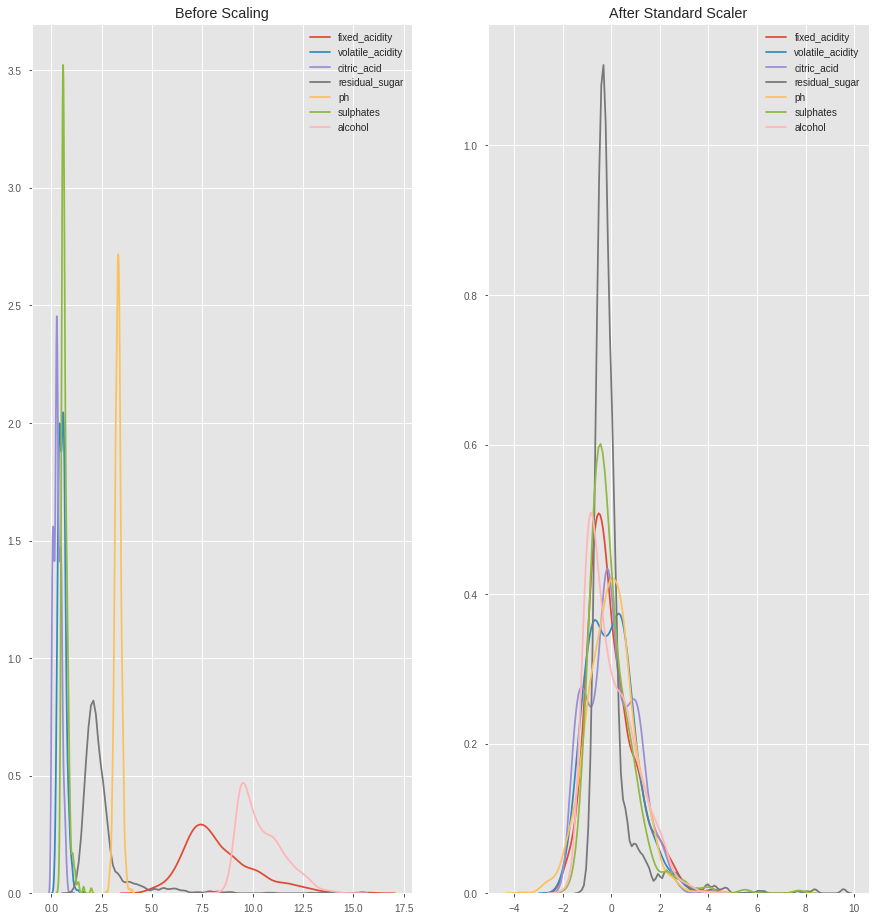

    fixed_acidity  volatile_acidity  citric_acid  ...        ph  sulphates   alcohol
0       -0.524431          0.932000    -0.140856  ...  1.291872  -0.578561 -0.954374
1       -0.294063          1.915800    -0.140856  ... -0.708395   0.124822 -0.584575
2       -0.294063          1.259934    -1.448218  ... -0.321247  -0.051024 -0.584575
3        1.664067         -1.363534     1.495073  ... -0.966495  -0.461331 -0.584575
4       -0.524431          0.713378    -0.140856  ...  1.291872  -0.578561 -0.954374
5       -0.236471          0.385444    -1.335015  ... -0.063148  -1.164714 -0.954374
6       -0.582023          0.658722    -0.140856  ...  0.517575  -1.106099 -0.399675
7       -0.294063          0.276133    -1.561422  ...  0.324001  -0.519946 -0.861924
8       -0.466839         -0.161111     0.363038  ...  0.259476   0.828204  0.062574
9       -0.927575          0.276133    -1.221811  ... -0.192197  -0.695792 -1.139274
10      -1.561088          0.467428    -0.140856  ...  1.743546  

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

x = RedWineData.drop(['quality','quality_type'],axis =1,inplace=False)
# Using tandard Scalar
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 16))

ax1.set_title('Before Scaling')
sns.kdeplot(RedWineData['fixed_acidity'], ax=ax1)
sns.kdeplot(RedWineData['volatile_acidity'], ax=ax1)
sns.kdeplot(RedWineData['citric_acid'], ax=ax1)
sns.kdeplot(RedWineData['residual_sugar'], ax=ax1)
sns.kdeplot(RedWineData['ph'], ax=ax1)
sns.kdeplot(RedWineData['sulphates'], ax=ax1)
sns.kdeplot(RedWineData['alcohol'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(x['fixed_acidity'], ax=ax2)
sns.kdeplot(x['volatile_acidity'], ax=ax2)
sns.kdeplot(x['citric_acid'], ax=ax2)
sns.kdeplot(x['residual_sugar'], ax=ax2)
sns.kdeplot(x['ph'], ax=ax2)
sns.kdeplot(x['sulphates'], ax=ax2)
sns.kdeplot(x['alcohol'], ax=ax2)
plt.show()
print(x.head(50))



### Again Check the dataset using Pandas profiling

In [0]:
# Recheck the final Dataset using Pandas Profiling
report = pandas_profiling.ProfileReport(x)
#convert profile report as html file
report.to_file("RedWineData_data1.html")

from IPython.display import display,HTML,IFrame
display(HTML(open('RedWineData_data1.html').read()))

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,11
Number of observations,1359
Total Missing (%),0.0%
Total size in memory,116.9 KiB
Average record size in memory,88.1 B
Numeric,11
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Panda profiling report looks good, lets start creating the Models

##  Selecting Machine Learning Models


###  For the selection of Machine Learning models based on diffrent charateristics of Data and problem statement I have referred Scikit learn Algo selection Cheat Sheet from the following link
  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![alt text](https://drive.google.com/uc?id=1hoFjRZrnzvjr6GL-Yh_0reis9t6l1djJ)
1.   Need to classify the data into diffrent classes
2.   Have a labeled data
3.   Sample size is <100K









In [0]:
from sklearn.svm import SVC, LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score 

### Create Features and Lables

In [0]:
# x = RedWineData.drop(['quality','quality_type'],axis =1,inplace=False)
y = RedWineData['quality_type']
x.shape
y.shape
x
y

(1359, 11)

(1359,)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,-0.524431,0.932000,-0.140856,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-0.140856,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.448218,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.495073,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-0.140856,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374
...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.869983,0.494756,-1.221811,-0.461157,-0.407702,1.159265,-0.264277,-0.106490,0.711149,0.945435,-0.861924
1355,-1.215536,0.385444,-1.221811,-0.387183,0.038015,1.542281,-0.084619,-0.968269,0.904724,-0.461331,0.062574
1356,-1.388312,0.112167,-1.108608,-0.239233,-0.529261,2.212559,0.124983,-0.850510,1.356397,0.593744,0.709723
1357,-1.388312,0.631395,-0.995404,-0.387183,-0.265883,1.542281,-0.084619,-0.663167,1.679021,0.300667,-0.214775


0       2
1       2
2       2
3       2
5       2
       ..
1593    2
1594    2
1595    2
1597    2
1598    2
Name: quality_type, Length: 1359, dtype: int64

### Create Test and Train dataset

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=21)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(1087, 11)

(272, 11)

(1087,)

(272,)

### 1. Linear SVC model

In [0]:
# Build Model
LinearSVC_Model = LinearSVC()


In [0]:
#Fitting the Model 
LinearSVC_Model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
# Predict using Model
y_pred_test = LinearSVC_Model.predict(x_test)
y_pred_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
# Evaluate the Model Performance
metrics.accuracy_score(y_test,y_pred_test)

0.8492647058823529

### 2. K Nearest Neighbour(KNN) Model

In [0]:
### Build KNN Model
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier(n_neighbors=3,weights='distance',n_jobs=-1,algorithm='auto',metric='manhattan')


In [0]:
# Fitting the model
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')

In [0]:
# Let the model predict using test data 
y_pred_test = KNN_Model.predict(x_test)
y_pred_test

array([2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 3, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1,
       2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2])

In [0]:
### Evaluate the model performance
metrics.accuracy_score(y_test,y_pred_test)

0.8382352941176471

### 3. Build SVM model

In [0]:
# Build Model
svm_Model = svm.SVC(gamma='scale',random_state=21)

In [0]:
# Fitting the Model 
svm_Model.fit(x_train,y_train)

In [0]:
# Predict using Model
y_pred_test = svm_Model.predict(x_test)
y_pred_test

In [0]:
# Evaluate the Model Performance
metrics.accuracy_score(y_test,y_pred_test)